# Reading off-axis rays from CSV files to plot Hyp and Par hits on the module shells

### @Milo, Dec 2017

Reading 30arcmin off-axis rays

Defining customed function to read the rays:

In [5]:
#Rrays0 = load_rays('/Users/Kamilobu/Desktop/MakeRays/30arcmin/run00.csv')
Rrays = load_rays('/Users/Kamilobu/Desktop/MakeRays/30arcmin/run01.csv')
#Rrays = Rrays0 + Rrays1
print('Number of rays0 : {:d}'.format(len(Rrays)))

NameError: name 'load_rays' is not defined

In [6]:
prays = [ray.pos for ray in Rrays]
orays = [ray.ori for ray in Rrays]
srays = [ray.src for ray in Rrays]
drays = [ray.des for ray in Rrays]
trays = [ray.tag for ray in Rrays]
hrays = [ray.hist for ray in Rrays]
brays = [ray.bounces for ray in Rrays]
deadrays = [ray.dead for ray in Rrays]

Hrays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] >= 30 )]
Prays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] <= 30 )]
Hx, Hy = np.array([ray.hist[0] for ray in Hrays]), np.array([ray.hist[1] for ray in Hrays])
Px, Py = np.array([ray.hist[0] for ray in Prays]), np.array([ray.hist[1] for ray in Prays])

NameError: name 'Rrays' is not defined

NameError: name 'Px' is not defined

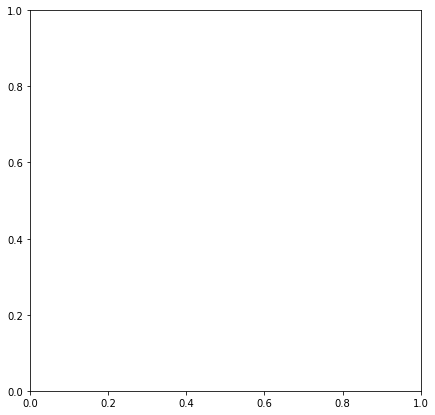

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=0.5,color='b')
plt.scatter(Hx,Hy,s=0.5,color='r')
plt.title('10e6 Rays Hiting the Paraboloid mirror 30\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

Let's save the rays. Testing the program to save the rays:

A file containing the next piece of code was created and saved in a folder called 1millionRays that contains 1 million rays generated that interact with the modules. 

In [45]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
Sdist = -1.5e13           ## cm
offaxisAngle = 30.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 500
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)
Rrays = [ray for ray in rays if (ray.tag != 'Source')] #kills the passthrough rays
from foxsisim.util import save_rays
save_rays(Rrays,filename='rays_on_module.csv')
print(len(Rrays))
print('Done!')

r0 =  5.340631866960363
r1 =  3.36
